# CEE 498: Transportation Economics

## Assignment Three: Operator Objectives

Noah Garfinkle (garfink2@illinois.edu)

13 February 2020

# Imports and Setup

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import root_scalar #this works only for scalar functions
from scipy.optimize import minimize
import sympy as sy
%matplotlib inline

# Problem 1

Ridership, $Q$, on a bus line is given by

$$
Q=e^{\alpha-\beta P-\frac{\gamma}{f}}
$$

Where $\alpha=4$, $\beta=0.25$, and $\gamma=4$.
You have to cover fixed costs $F=5$.  The cost of frequency is $c_f=3$.

In [8]:
def Q(P,f,α=4.0,β=0.25,γ=4.0):
    q = np.exp(α-β*P-γ/f)
    return q

In [9]:
def P(Q,f,α=4.0,β=0.25,γ=4.0):
    p = 1/β * (α-γ/f-np.log(Q))
    return p

In [10]:
def Check_BC(P,f,cf=3.0,F=5.0):
    bc = Q(P,f)*P-cf*f-F
    return bc

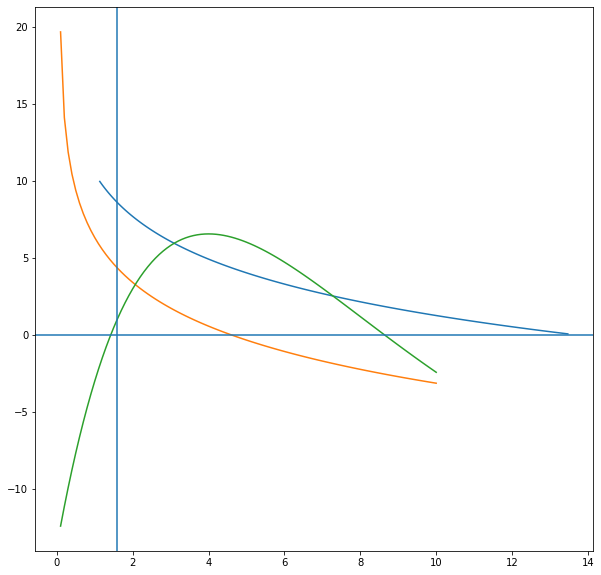

In [11]:
Ps = np.linspace(0.1,10,100)
QsSpace = np.linspace(0.1,10,100)
QsPlot = [Q(P,2.91) for P in Ps]
BCPlot = [Check_BC(P,2.91) for P in Ps]
PsPlot = [P(Q,2.91) for Q in Qs]
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(QsPlot,Ps)
ax.plot(QsSpace,PsPlot)
ax.plot(Ps,BCPlot)
ax.axvline(1.59)
ax.axhline(0)

## Part a

Derive and calculate values for $P$, $Q$, and $f$ which maximize ridership.

In [42]:
def fstar(Q,α=4.0,β=0.25,γ=4.0,cf=3.0,F=5.0):
    f = np.power(Q*γ/(β*cf),0.5)
    return f

In [43]:
def pstar(Q,α=4.0,β=0.25,γ=4.0,cf=3.0,F=5.0):
    p = 1/β * (α - (np.power(γ,0.5)*np.power(cf,0.5)*np.power(β,0.5))/np.power(Q,0.5) - np.log(Q))
    return p

In [44]:
def BC(Q,α=4.0,β=0.25,γ=4.0,cf=3.0,F=5.0):
    bc = pstar(Q)*Q - cf * fstar(Q) - F
    return bc

In [45]:
Qs = np.linspace(0.1,40,100)
BCs = [BC(Q) for Q in Qs]

In [48]:
res = root_scalar(BC,x0=26,bracket=(25,30))
Qstar = res.root
print(res)
print(res.root)
print(BC(res.root)) #this is about zero

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 26.618787440035774
26.618787440035774
-2.1316282072803006e-14


Text(0, 0.5, 'Budget Constraint')

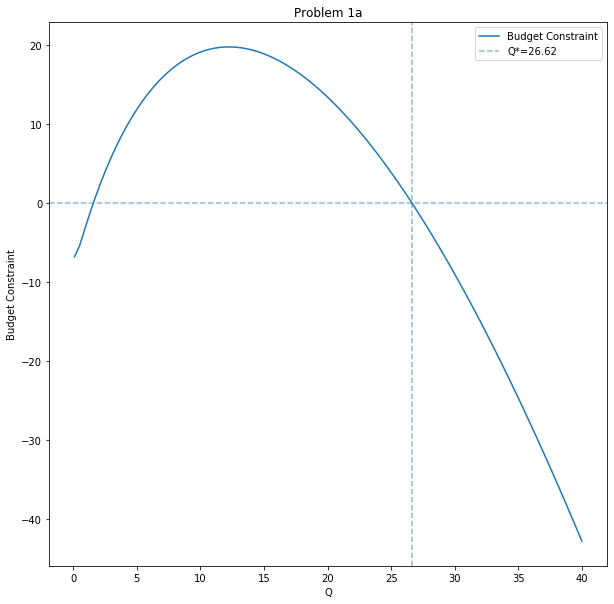

In [49]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(Qs,BCs,label="Budget Constraint")
ax.axhline(0,ls="--",alpha=0.5)
ax.axvline(res.root,ls="--",alpha=0.5,label=f"Q*={res.root:,.2f}")
ax.legend()
ax.set_title("Problem 1a")
ax.set_xlabel("Q")
ax.set_ylabel("Budget Constraint")

In [50]:
fstar(Qstar)

11.914984949501928

In [51]:
pstar(Qstar)

1.5306841057389278

In [52]:
Check_BC(pstar(Qstar),fstar(Qstar),cf=3.0,F=5.0)

-1.4210854715202004e-14

## Part b

Derive and calculate values for $P$, $Q$, and $f$ which maximize frequency.

In [21]:
def BC(f,α=4.0,β=0.25,γ=4.0,cf=3.0,F=5.0):
    bc = 1/β*np.exp(α-1-γ/f)-cf-F
    return bc

In [25]:
Fs = np.linspace(0.1,30,100)
BCs = [BC(f) for f in Fs]

In [26]:
res = root_scalar(BC,x0=1.5,bracket=(1,2))
fstar = res.root
print(res)
print(res.root)
print(BC(res.root)) #this is about zero

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 1.733964111750712
1.733964111750712
0.0


Text(0, 0.5, 'Budget Constraint')

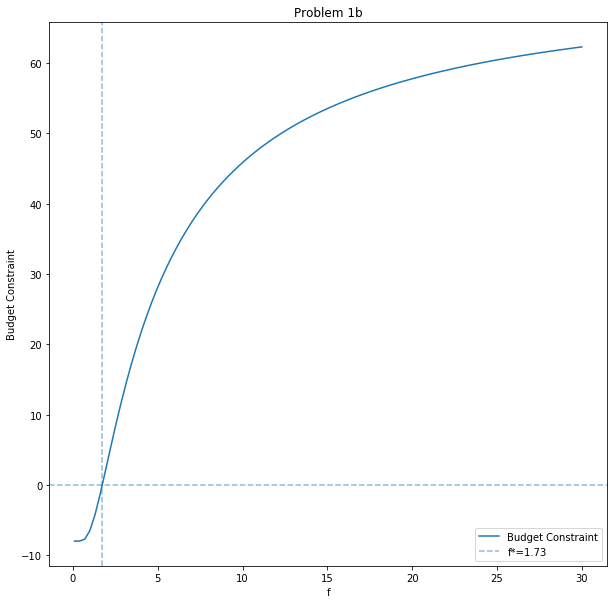

In [27]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(Fs,BCs,label="Budget Constraint")
ax.axhline(0,ls="--",alpha=0.5)
ax.axvline(res.root,ls="--",alpha=0.5,label=f"f*={res.root:,.2f}")
ax.legend()
ax.set_title("Problem 1b")
ax.set_xlabel("f")
ax.set_ylabel("Budget Constraint")

In [28]:
pstar=4.0

In [105]:
qstar = np.exp(4.0-1-4.0/1.73)

In [106]:
qstar

1.9894560738995266

In [107]:
Check_BC(pstar,fstar,cf=3.0,F=5.0)

-2.2018923352521362

# Problem 2

Suppose that the federal government agrees to cover the fixed costs, so $F=0$.  Derive, in terms of $\alpha$, $\beta$, $\gamma$ , and $c$ the value of $f$ at which price is minimized, and the minimum price.


In [29]:
def fstar(Q,α=4.0,β=0.25,γ=4.0,cf=3.0,F=0.0):
    f = np.power(Q*γ/(β*cf),0.5)
    return f

In [30]:
def pstar(Q,α=4.0,β=0.25,γ=4.0,cf=3.0,F=0.0):
    p = 1/β * (α - (np.power(γ,0.5)*np.power(cf,0.5)*np.power(β,0.5))/np.power(Q,0.5) - np.log(Q))
    return p

In [31]:
def BC(Q,α=4.0,β=0.25,γ=4.0,cf=3.0,F=0.0):
    bc = pstar(Q)*Q - cf * fstar(Q) - F
    return bc

In [32]:
Qs = np.linspace(0.1,30,100)
BCs = [BC(Q) for Q in Qs]

In [36]:
res = root_scalar(BC,x0=28,bracket=(27,30))
Qstar = res.root
print(res)
print(res.root)
print(BC(res.root)) #this is about zero

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 28.55109114762533
28.55109114762533
-4.973799150320701e-14


Text(0, 0.5, 'Budget Constraint')

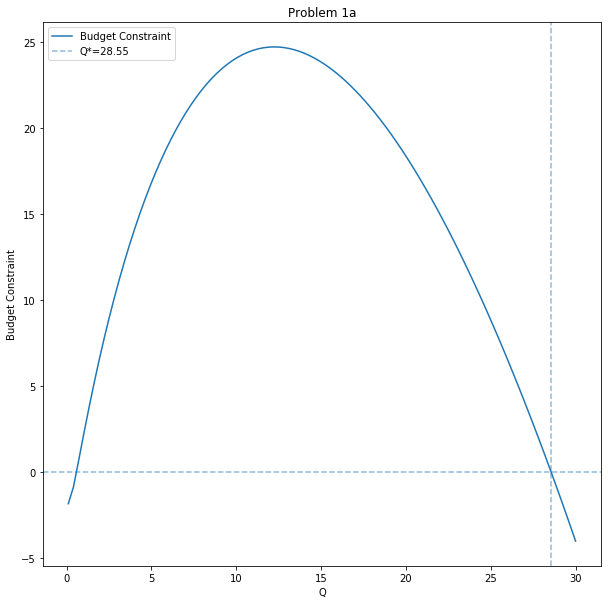

In [37]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(Qs,BCs,label="Budget Constraint")
ax.axhline(0,ls="--",alpha=0.5)
ax.axvline(res.root,ls="--",alpha=0.5,label=f"Q*={res.root:,.2f}")
ax.legend()
ax.set_title("Problem 1a")
ax.set_xlabel("Q")
ax.set_ylabel("Budget Constraint")

In [38]:
fstar(Qstar)

12.339873829203782

In [39]:
pstar(Qstar)

1.2966096915945826

In [40]:
Check_BC(pstar(Qstar),fstar(Qstar),cf=3.0,F=5.0)

-5.000000000000043